# Data from other sources - WIP

### Neuromorpho 

Neuromorpho.org is a jsp website.  
Scrape and download using selenium. 

In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
ls

allen_morpho/                          neuro_morpho/
analyze_swcfile.py                     neuroncollector.py
analyze_swcfile.pyc                    neuroncollector.pyc
Basic data storage and EDA.ipynb       notes.md
cell_types/                            phantomjs-2.1.1-linux-x86_64/
database.py                            __pycache__/
Data from other sources - mac.ipynb    README.md
Data from other sources -ubuntu.ipynb  sc.png
geckodriver.log                        screenshot.png
ghostdriver.log                        tmp/
Load Allen Institute Data - mac.ipynb  Untitled1.ipynb
morpho_data/


In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from bs4 import BeautifulSoup as BS
import neuroncollector
import time

Connected to mongodb://localhost:27017/


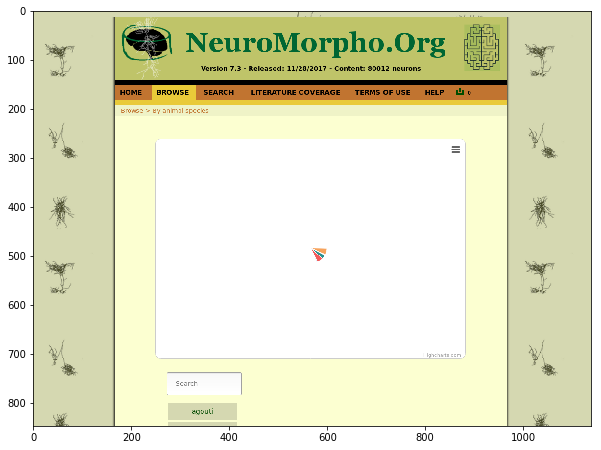

In [29]:
# initialize scraper
scraper = neuroncollector.NeuroScraper(browser="Firefox",machine='ubuntu')
time.sleep(3)
#access website
scraper.driver.get('http://neuromorpho.org/byspecies.jsp')

# get screenshot
scraper.driver.get_screenshot_as_file(filename='sc.png')
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [30]:
species = scraper.driver.find_elements_by_class_name('species')

# Total number of species in neuromorpho database:
len(species)

40

In [31]:
# Mouse data collection
scraper.driver.find_element_by_link_text('mouse')

# click on species:mouse 
scraper.driver.find_element_by_link_text('mouse').click()

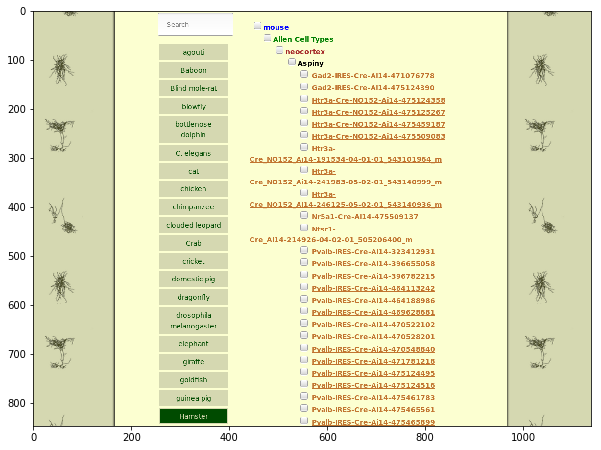

In [32]:
time.sleep(30) #wait for data to load on page

#get screenshot
scraper.driver.get_screenshot_as_file(filename='sc.png')
plt.figure(figsize=(10,10))
img=mpimg.imread('sc.png')
imgplot = plt.imshow(img)
plt.show()

In [33]:
# `lvl2` is class name for data source (i.e. the contributors)
lvl2 = scraper.driver.find_elements_by_class_name('lvl2')

len(lvl2)

217

In [34]:
# optionally get the entire page for parsing and soupify
soup = BS(scraper.driver.page_source, "html.parser")

In [35]:
# get list of data sources
datasources = soup.findAll("font", {"class": "lvl2"})
source_name = [a.text for a in datasources]

In [36]:
# `lvl3` is label for brain regions
brain_region = soup.findAll("font", {"class": "lvl3"})

set([a.text for a in brain_region])

{u'Not reported',
 u'Olfactory Bulb',
 u'accessory olfactory bulb',
 u'amygdala',
 u'anterior olfactory nucleus',
 u'basal ganglia',
 u'brainstem',
 u'cerebellum',
 u'dorsal thalamus',
 u'entorhinal cortex',
 u'hippocampus',
 u'hypothalamus',
 u'main olfactory bulb',
 u'myelencephalon',
 u'neocortex',
 u'peripheral nervous system',
 u'retina',
 u'spinal cord',
 u'subiculum',
 u'thalamus',
 u'ventral striatum',
 u'ventral thalamus'}

In [37]:
#Neuron cell types!  
cell_types = soup.findAll("font", {"class": "lvl4"})

set([a.text for a in cell_types])  

{u'Aspiny',
 u'Back-Projecting',
 u'Cajal-Retzius',
 u'Cannabinoid receptor (CB1R)-positive',
 u'Chandelier',
 u'Excitatory',
 u'Fast-spiking',
 u'GABAergic',
 u'GAD65-expressing',
 u'Golgi',
 u'HICAP',
 u'HIPP',
 u'Induced Neurons',
 u'Inhibitory',
 u'Lugaro',
 u'MOPP',
 u'Martinotti',
 u'Motoneuron',
 u'Muscarinic-responsive',
 u'Neuroblast',
 u'Neuropeptide Y (NPY)-positive',
 u'Non-glutamatergic',
 u'Not reported',
 u'Oligodendrocyte',
 u'Parvalbumin (PV)-positive',
 u'Pseudounipolar',
 u'Purkinje',
 u'Pyramidal-like',
 u'Regulator of calcineurin 2 (Rcan2)-postive',
 u'Renshaw',
 u'Schaffer-collateral associated',
 u'Serotonin receptor type 3A (5-HT3)-positive',
 u'Somatostatin (SOM) containing cell',
 u'Somatostatin (SOM)-positive',
 u'Spiny',
 u'Total molecular layer projecting',
 u'Trilaminar',
 u'Vasoactive Intestinal Peptide (VIP)-positive',
 u'amacrine',
 u'astrocyte',
 u'axonless',
 u'basket',
 u'bipolar',
 u'bistratified',
 u'bitufted',
 u'deep projecting cell',
 u'deep sho

In [38]:
# individual neuron ids
neurons = soup.findAll("a", {"class": "screenshot"})

# Number of neurons
len(neurons)

17817

In [39]:
# Click to get meta data files
# scraper.driver.find_element_by_name('Sig').click()
scraper.driver.find_element_by_name('Aux').click()

In [40]:
for idnum in range(len(datasources)):
    scraper.driver.switch_to.window(scraper.driver.window_handles[0])
    print("{} - Clicking on {}".format(idnum,datasources[idnum].text))
    if idnum > 0: 
        scraper.driver.find_elements_by_id('mouse_chkbox')[idnum-1].click()
    scraper.driver.find_elements_by_id('mouse_chkbox')[idnum].click()
    # Get selected files 
    scraper.driver.find_element_by_xpath("//input[@value='Get SWC files of selected neurons']").click()
    time.sleep(5)
    scraper.driver.switch_to.window(scraper.driver.window_handles[1])
    time.sleep(10)
    scraper.driver.find_element_by_name('yes').click()
    time.sleep(20)
    scraper.driver.close()

0 - Clicking on Allen Cell Types
1 - Clicking on Andolina
2 - Clicking on Anstoetz
3 - Clicking on Anton
4 - Clicking on Arenkiel
5 - Clicking on Ascoli
6 - Clicking on Bacci
7 - Clicking on Bacigaluppi
8 - Clicking on Badea
9 - Clicking on Baldwin
10 - Clicking on Ballester-Rosado
11 - Clicking on Bannatyne
12 - Clicking on Barco_Scandaglia
13 - Clicking on Bartos
14 - Clicking on Bastian
15 - Clicking on Baulac
16 - Clicking on Beguin
17 - Clicking on Bleckert
18 - Clicking on Brager
19 - Clicking on Branchereau_Cattaert
20 - Clicking on Brecha
21 - Clicking on Briggman
22 - Clicking on Brumberg
23 - Clicking on Brunjes
24 - Clicking on Burdakov
25 - Clicking on Burkhalter
26 - Clicking on Caille
27 - Clicking on Calabresi
28 - Clicking on Capogna
29 - Clicking on Caviedes
30 - Clicking on Chalupa
31 - Clicking on Chandrashekar
32 - Clicking on Chen_SK
33 - Clicking on Cho
34 - Clicking on Danzer
35 - Clicking on De Bartolo
36 - Clicking on De Schutter
37 - Clicking on DeFelipe
38 - 

In [41]:
[(i, a.text) for i, a in enumerate(datasources) if a.text== u'Nusser']

[(130, u'Nusser')]

In [42]:
scraper.driver.window_handles

[u'2147483649']

In [43]:
# Todo: tidy up and create functions using notebook 

In [44]:
scraper.driver.quit()